In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Reading in normalized data & cleaning up
normalized_counts = pd.read_csv('normalized_counts.csv')
del normalized_counts['Unnamed: 0']
normalized_counts.drop(8, inplace=True)
normalized_counts.sort_values('total_norm', ascending=False, inplace=True)
normalized_counts.head()

,State,Total Population,State Abbr,black,jews,muslim,norm_black,norm_jewish,norm_muslim,total_count,total_norm
40,Vermont,624594,VT,2.0,1.0,0.0,0.000320,0.000160,0.000000,3.0,0.000480
22,Mississippi,2988726,MS,5.0,1.0,7.0,0.000167,0.000033,0.000234,13.0,0.000435
7,Delaware,952065,DE,3.0,1.0,0.0,0.000315,0.000105,0.000000,4.0,0.000420
20,Michigan,9928300,MI,16.0,9.0,7.0,0.000161,0.000091,0.000071,32.0,0.000322
35,Rhode Island,1056426,RI,1.0,1.0,1.0,0.000095,0.000095,0.000095,3.0,0.000284


In [7]:
# Reading in income data
income = pd.read_csv("census_data/2016_income.csv", dtype={"Median": np.int32})
income.rename(columns={"Unnamed: 0": "State"}, inplace=True)
income = income[['State', 'Median']]
income.head()

,State,Median
0,Alabama,46257
1,Alaska,76440
2,Arizona,53558
3,Arkansas,44334
4,California,67739


In [8]:
# Getting top 5 and bottom 5
top_5 = normalized_counts.head()
bottom_5 = normalized_counts.tail()

In [9]:
# Mergin income data
top_5 = top_5.merge(income)
bottom_5 = bottom_5.merge(income)

# Top 5 States

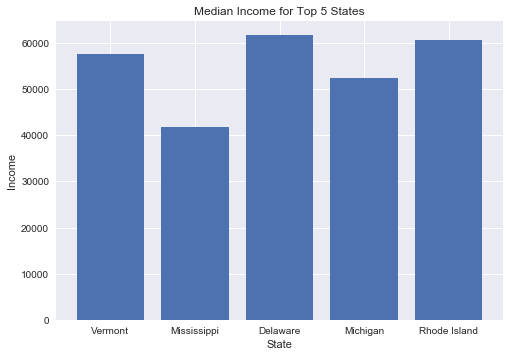

In [13]:
# x & y values
x_axis = np.arange(5)
y_axis = top_5['Median']

plt.bar(x_axis, y_axis)
    
plt.title("Median Income for Top 5 States")
plt.xlabel("State")
plt.ylabel("Income")

x_labels = top_5['State']
x_locations = [value for value in np.arange(5)]
plt.xticks(x_locations, x_labels)

plt.savefig("Images/income_top_5.png", bbox_inches="tight")

plt.show()

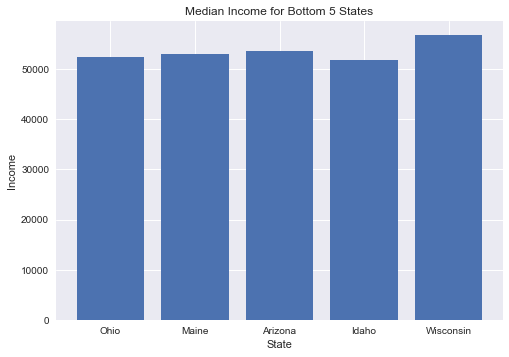

In [14]:
# x & y values
x_axis = np.arange(5)
y_axis = bottom_5['Median']

plt.bar(x_axis, y_axis)
    
plt.title("Median Income for Bottom 5 States")
plt.xlabel("State")
plt.ylabel("Income")

x_labels = bottom_5['State']
x_locations = [value for value in np.arange(5)]
plt.xticks(x_locations, x_labels)

plt.savefig("Images/income_bottom_5.png", bbox_inches="tight")

plt.show()